In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Activation, Dense, Dropout, BatchNormalization, ZeroPadding2D
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Using TensorFlow backend.


# AlexNet

In [4]:
# Initialize model
model = Sequential()

c1 = Conv2D(filters = 96, kernel_size = 11, input_shape = (227, 227, 3), strides = 4, activation = 'relu', name = 'c1')
mp1 = MaxPool2D(pool_size = 3, strides = 2, name = 'mp1')

zp2 = ZeroPadding2D((2, 2), name = 'zp1')
c2 = Conv2D(filters = 256, kernel_size = 5, activation = 'relu', name = 'c2')
mp2 = MaxPool2D(pool_size = 3, strides = 2, name = 'mp2')

c3 = Conv2D(filters = 384, kernel_size = 3, activation = 'relu', name = 'c3')

zp4 = ZeroPadding2D((1, 1), name = 'zp2')
c4 = Conv2D(filters = 384, kernel_size = 3, activation = 'relu', name = 'c4')

zp5 = ZeroPadding2D((1, 1), name = 'zp3')
c5 = Conv2D(filters = 256, kernel_size = 3, activation = 'relu', name = 'c5')
mp5 = MaxPool2D(pool_size = 3, strides = 2, name = 'mp3')

# Layer 1
model.add(c1)
model.add(mp1)

# Layer 2
model.add(zp2)
model.add(c2)
model.add(mp2)

# Layer 3
model.add(c3)

# Layer 4
model.add(zp4)
model.add(c4)

# Layer 5
model.add(zp5)
model.add(c5)
model.add(mp5)

# Layer 6
model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))

# Layer 7
model.add(Dense(4096, activation = 'relu'))

# Layer 8
model.add(Dense(10, activation = 'relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
c1 (Conv2D)                  (None, 55, 55, 96)        34944     
_________________________________________________________________
mp1 (MaxPooling2D)           (None, 27, 27, 96)        0         
_________________________________________________________________
zp1 (ZeroPadding2D)          (None, 31, 31, 96)        0         
_________________________________________________________________
c2 (Conv2D)                  (None, 27, 27, 256)       614656    
_________________________________________________________________
mp2 (MaxPooling2D)           (None, 13, 13, 256)       0         
_________________________________________________________________
c3 (Conv2D)                  (None, 11, 11, 384)       885120    
_________________________________________________________________
zp2 (ZeroPadding2D)          (None, 13, 13, 384)       0         
__________

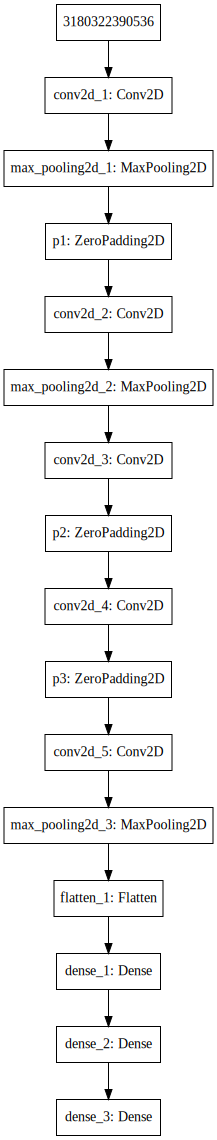

In [3]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))